In [1]:
#Dataset de 2021 
#Nous utilisons ce jeu de données pour déterminers quelles sont les principales motivations derrière le choix d'un mode
#de transport.
import pandas as pd

df2021 = pd.read_excel('Data INP/2021_ChallengeMobilite21_v2.xlsx')
df2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 45 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   N°Obs                                                                                                                 735 non-null    int64  
 1   1. Vous êtes ?  *                                                                                                     735 non-null    object 
 2   2. Lieu de travail *                                                                                                  178 non-null    object 
 3   3. Nom de votre école ?  *                                                                                            557 non-null    object 
 4   4. Quell

In [3]:
df_choix = df2021[['33. Pourquoi avez-vous choisi ce mode de transport pour vous rendre sur votre lieu de travail ?_(3 réponses maximum)']]
df_choix
df_choix.to_excel('choix.xlsx', index=False)

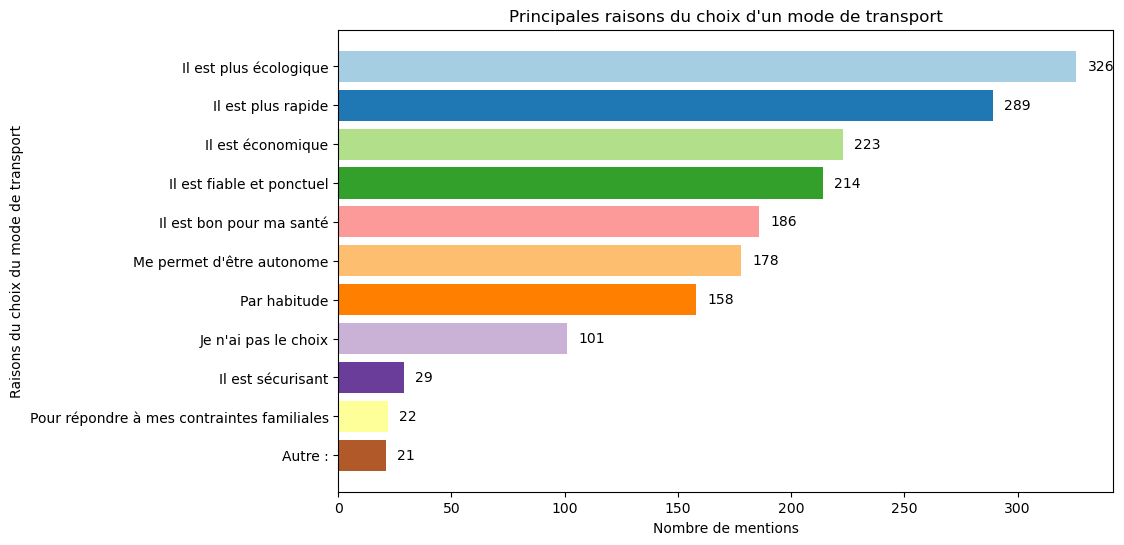

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Renommage de la colonne contenant les réponses
col_name = "33. Pourquoi avez-vous choisi ce mode de transport pour vous rendre sur votre lieu de travail ?_(3 réponses maximum)"
df_choix = df_choix.rename(columns={col_name: "Reasons"})

# Extraction et comptage des raisons
reasons_series = df_choix["Reasons"].dropna().str.split(';').explode()
reasons_counts = Counter(reasons_series)

# Conversion en DataFrame et triage par fréquence
df_choix = pd.DataFrame(reasons_counts.items(), columns=['Reason', 'Count']).sort_values(by='Count', ascending=False)

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Génération des couleurs et des hauteurs des barres
colors = plt.cm.Paired(np.linspace(0, 1, len(df_choix)))
bars = ax.barh(df_choix['Reason'], df_choix['Count'], color=colors)

# Ajout des labels et du titre 
ax.set_xlabel("Nombre de mentions")
ax.set_ylabel("Raisons du choix du mode de transport")
ax.set_title("Principales raisons du choix d'un mode de transport")

# Ajout des valeurs sur les barres
for bar in bars:
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
            str(int(bar.get_width())), va='center')

# Inversion de l'axe Y pour afficher la raison la plus populaire en haut
plt.gca().invert_yaxis()

# Affichage de la visualisation
plt.show()

